In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline
import pickle

Update end date below to the previous day's date

In [ ]:
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%m/%d/%Y')

In [ ]:
x = pd.date_range(start='3/25/2020', end=yesterday)
date_list = []
for date_value in x.strftime('%m-%d-%Y'):
    date_list.append(date_value)
dt_date_list = pd.to_datetime(pd.Series(date_list))

https://github.com/CSSEGISandData/COVID-19

In [ ]:
df_jhu_total_dict= {}
for y in range(len(date_list)):
#    !sleep 3
    url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + date_list[y] + r'.csv'
    df_jhu_total_dict[date_list[y]] = pd.read_csv(url_value,header=0)
    df_jhu_total_dict[date_list[y]]['dt_date'] = dt_date_list[y]
    print(date_list[y])

In [ ]:
with open(yesterday.strftime('%d_%b_%Y') + r'_JHU_total_data.pkl', 'wb') as ofile:
    pickle.dump(df_jhu_total_dict, ofile)

In [ ]:
!ls -alt *.pkl


In [ ]:
with open('10_Jan_2022_JHU_total_data.pkl', 'rb') as ifile:
    df_jhu_total_dict = pickle.load(ifile)

In [ ]:
len(df_jhu_total_dict)

df_jhu_additional_dict = {}
url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-28-2021.csv'
df_jhu_additional_dict['12-28-2021'] = pd.read_csv(url_value,header=0)

df_jhu_additional_dict

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
total_key_list = list(df_jhu_total_dict.keys())
part_key_list = total_key_list[300::]

In [ ]:
def process_combined_key_confirmed(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Confirmed']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    ddd_7day_moving = ddd.rolling(7).mean().shift()
    return(ddd,passed_combined_key,ddd_7day_moving)

comkey = 'Bexar, Texas, US'
aaa = df_jhu_total_dict[date_list[-10]].loc[df_jhu_total_dict[date_list[-10]].Combined_Key == comkey]

In [ ]:
def chart_daily_confirmed(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('New COVID Cases',color='black')
    plt.bar(passed_df.index,passed_df.Confirmed)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Active Cases'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')
plt.close()

In [ ]:
def process_combined_key_deaths(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Deaths']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    ddd_7day_moving = ddd.rolling(7).mean().shift()
    return(ddd,passed_combined_key,ddd_7day_moving)

In [ ]:
def chart_daily_deaths(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Deaths')
    plt.xlabel('Date',color='black')
    plt.ylabel('New COVID Deaths',color='black')
    plt.bar(passed_df.index,passed_df.Deaths)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Deaths'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')
plt.close()

In [ ]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' New York, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
short_dict = {}
short_keys = date_list[-400:] 
for x in short_keys:
    short_dict[x] = df_jhu_total_dict[x]

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' New York, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_confirmed(short_dict, short_keys, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])
    

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Florida, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Florida, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' California, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_deaths(df_jhu_total_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [ ]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_deaths(df_jhu_total_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [ ]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_deaths(short_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [ ]:
def process_combined_key_fatality_ratio(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Case_Fatality_Ratio']]
    ccc = bbb.set_index('dt_date')
#    ddd = ccc.diff(periods = 1)
    ccc_7day_moving = ccc.rolling(7).mean().shift()
    return(ccc,passed_combined_key,ccc_7day_moving)

In [ ]:
def chart_daily_fatality_ratio(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('Case Fatality Ratio',color='black')
    plt.bar(passed_df.index,passed_df.Case_Fatality_Ratio)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Case Fatality Ratio'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_case_fatality_ratio(short_dict,short_keys, comkey)
    chart_daily_case_fatality_ratio(xxx[0], xxx[1], xxx[2])

In [ ]:
def process_combined_key_incident_rate(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Incident_Rate']]
    ccc = bbb.set_index('dt_date')
 #  ddd = ccc.diff(periods = 1)
    ccc_7day_moving = ccc.rolling(7).mean().shift()
    return(ccc,passed_combined_key,ccc_7day_moving)

In [ ]:
def chart_daily_incident_rate(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('Incident Rate',color='black')
    plt.bar(passed_df.index,passed_df.Incident_Rate)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Incident Rate'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')

In [ ]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_fatality_ratio(short_dict, short_keys, comkey)
    chart_daily_fatality_ratio(xxx[0], xxx[1], xxx[2])

In [ ]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_incident_rate(short_dict, short_keys, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_incident_rate(df_jhu_total_dict, date_list, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

In [ ]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_incident_rate(df_jhu_total_dict, date_list, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

In [ ]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_fatality_ratio(df_jhu_total_dict, date_list, comkey)
    chart_daily_fatality_ratio(xxx[0], xxx[1], xxx[2])

In [ ]:
aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'].sum()))
df_total_pediatric_patients_hospitalized_confirmed_and_suspected_covid = pd.DataFrame(aaa,columns=['date', 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'])

In [47]:
aaa = []
for x in range(1,len(date_list) - 1, 1):
    print(date_list[x + 1])
    print(df_jhu_total_dict[date_list[x + 1 ]][df_jhu_total_dict[date_list[x + 1]]['Country_Region'] =='US'][['Confirmed']].sum() - df_jhu_total_dict[date_list[x]][df_jhu_total_dict[date_list[x]]['Country_Region'] =='US'][['Confirmed']].sum())
    aaa.append((date_list[x + 1], int(df_jhu_total_dict[date_list[x + 1 ]][df_jhu_total_dict[date_list[x + 1]]['Country_Region'] =='US'][['Confirmed']].sum() - df_jhu_total_dict[date_list[x]][df_jhu_total_dict[date_list[x]]['Country_Region'] =='US'][['Confirmed']].sum())))
df_daily_us_total = pd.DataFrame(aaa,columns = ['date', 'new_cases'])

03-27-2020
Confirmed    17806
dtype: int64
03-28-2020
Confirmed    22352
dtype: int64
03-29-2020
Confirmed    16630
dtype: int64
03-30-2020
Confirmed    21120
dtype: int64
03-31-2020
Confirmed    26357
dtype: int64
04-01-2020
Confirmed    25167
dtype: int64
04-02-2020
Confirmed    30219
dtype: int64
04-03-2020
Confirmed    32300
dtype: int64
04-04-2020
Confirmed    33002
dtype: int64
04-05-2020
Confirmed    27970
dtype: int64
04-06-2020
Confirmed    30118
dtype: int64
04-07-2020
Confirmed    29097
dtype: int64
04-08-2020
Confirmed    32939
dtype: int64
04-09-2020
Confirmed    32839
dtype: int64
04-10-2020
Confirmed    34983
dtype: int64
04-11-2020
Confirmed    29959
dtype: int64
04-12-2020
Confirmed    28460
dtype: int64
04-13-2020
Confirmed    25255
dtype: int64
04-14-2020
Confirmed    26694
dtype: int64
04-15-2020
Confirmed    29318
dtype: int64
04-16-2020
Confirmed    31235
dtype: int64
04-17-2020
Confirmed    32175
dtype: int64
04-18-2020
Confirmed    32563
dtype: int64
04-19-2020


Confirmed    105775
dtype: int64
11-02-2020
Confirmed    83980
dtype: int64
11-03-2020
Confirmed    128260
dtype: int64
11-04-2020
Confirmed    103554
dtype: int64
11-05-2020
Confirmed    130118
dtype: int64
11-06-2020
Confirmed    128093
dtype: int64
11-07-2020
Confirmed    132551
dtype: int64
11-08-2020
Confirmed    115379
dtype: int64
11-09-2020
Confirmed    84400
dtype: int64
11-10-2020
Confirmed    145103
dtype: int64
11-11-2020
Confirmed    149488
dtype: int64
11-12-2020
Confirmed    161766
dtype: int64
11-13-2020
Confirmed    181126
dtype: int64
11-14-2020
Confirmed    172284
dtype: int64
11-15-2020
Confirmed    137913
dtype: int64
11-16-2020
Confirmed    159178
dtype: int64
11-17-2020
Confirmed    164163
dtype: int64
11-18-2020
Confirmed    173413
dtype: int64
11-19-2020
Confirmed    191899
dtype: int64
11-20-2020
Confirmed    201436
dtype: int64
11-21-2020
Confirmed    182034
dtype: int64
11-22-2020
Confirmed    146647
dtype: int64
11-23-2020
Confirmed    171946
dtype: int64
1

Confirmed    7176
dtype: int64
05-31-2021
Confirmed    6111
dtype: int64
06-01-2021
Confirmed    21496
dtype: int64
06-02-2021
Confirmed    17195
dtype: int64
06-03-2021
Confirmed    19104
dtype: int64
06-04-2021
Confirmed    17134
dtype: int64
06-05-2021
Confirmed    14605
dtype: int64
06-06-2021
Confirmed    5825
dtype: int64
06-07-2021
Confirmed    14829
dtype: int64
06-08-2021
Confirmed    13081
dtype: int64
06-09-2021
Confirmed    18989
dtype: int64
06-10-2021
Confirmed    14364
dtype: int64
06-11-2021
Confirmed    24834
dtype: int64
06-12-2021
Confirmed    8764
dtype: int64
06-13-2021
Confirmed    5264
dtype: int64
06-14-2021
Confirmed    12146
dtype: int64
06-15-2021
Confirmed    10900
dtype: int64
06-16-2021
Confirmed    12577
dtype: int64
06-17-2021
Confirmed    10623
dtype: int64
06-18-2021
Confirmed    21365
dtype: int64
06-19-2021
Confirmed    8681
dtype: int64
06-20-2021
Confirmed    4585
dtype: int64
06-21-2021
Confirmed    11336
dtype: int64
06-22-2021
Confirmed    10865

01-01-2022
Confirmed    116442
dtype: int64
01-02-2022
Confirmed    248174
dtype: int64
01-03-2022
Confirmed    1171378
dtype: int64
01-04-2022
Confirmed    799227
dtype: int64
01-05-2022
Confirmed    623390
dtype: int64
01-06-2022
Confirmed    786861
dtype: int64
01-07-2022
Confirmed    900832
dtype: int64
01-08-2022
Confirmed    378732
dtype: int64
01-09-2022
Confirmed    307292
dtype: int64
01-10-2022
Confirmed    1481375
dtype: int64


In [48]:
df_daily_us_total.tail(1).new_cases

654    1481375
Name: new_cases, dtype: int64

In [69]:
bbb = df_daily_us_total
bbb['date_dt'] = pd.to_datetime(bbb.date)
ccc = bbb
ccc = df_daily_us_total.set_index('date_dt')
ccc_rolling = ccc.rolling(7).mean().shift()

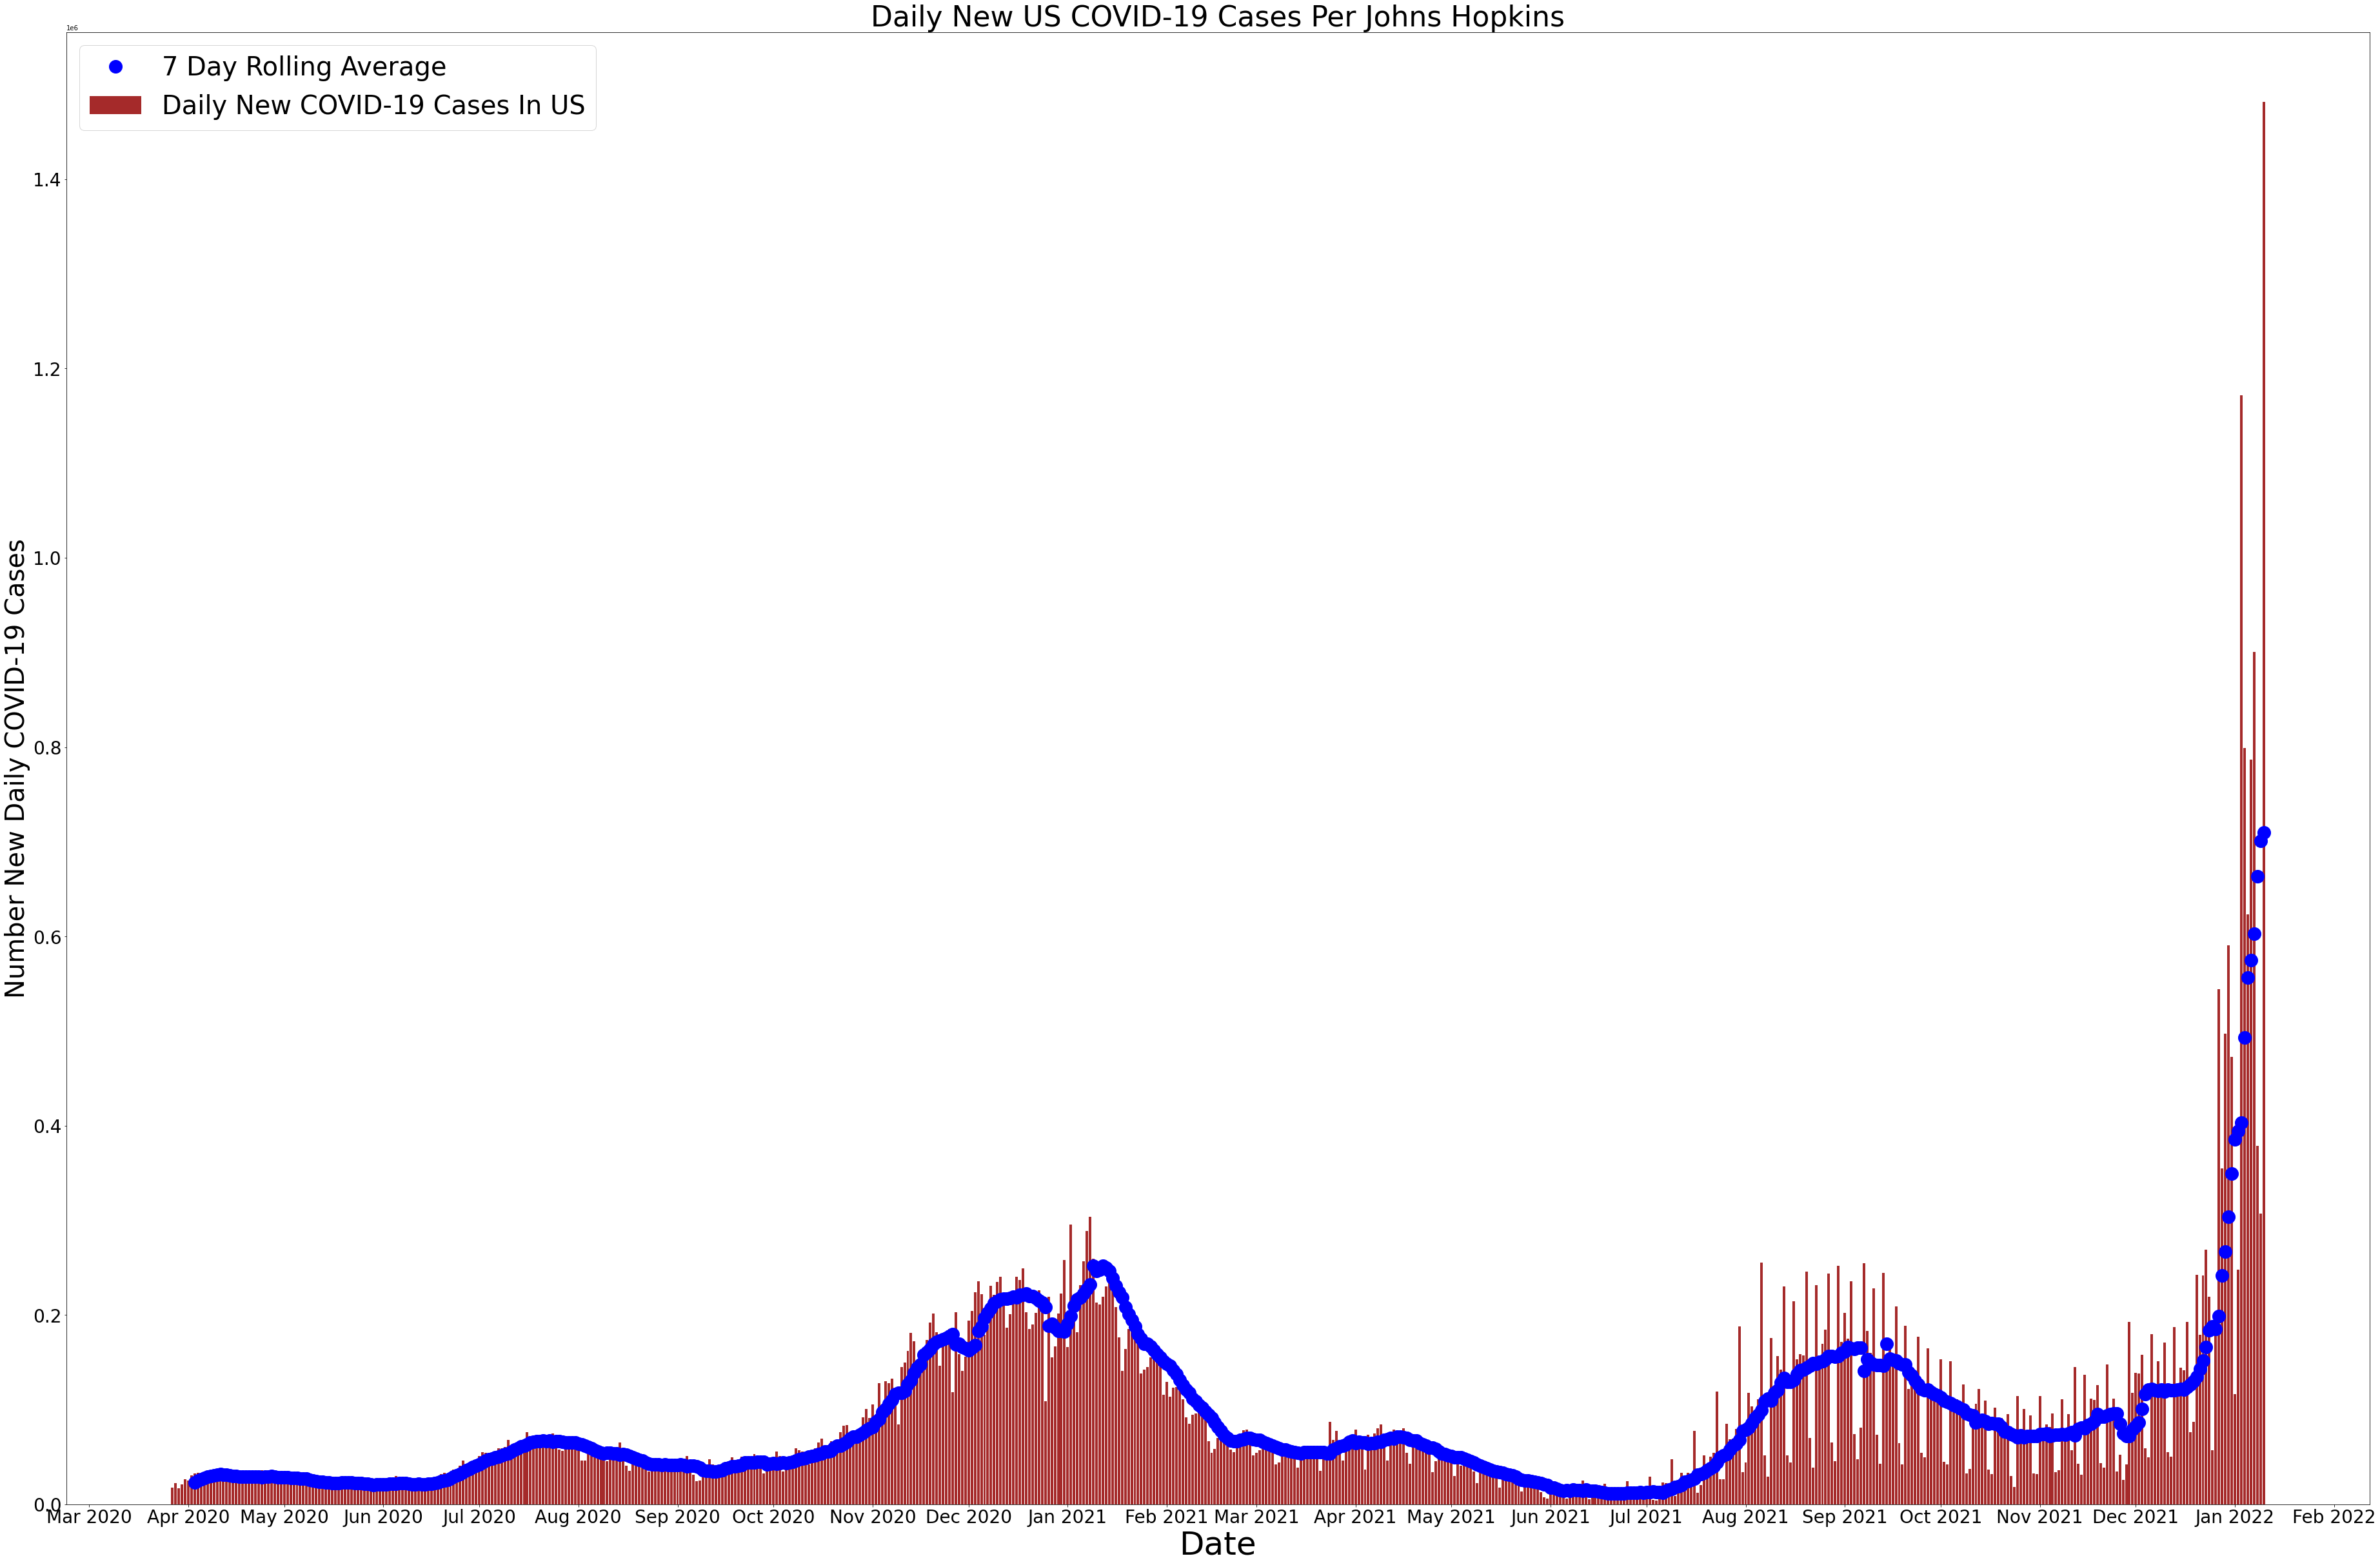

In [74]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(64,42)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily New US COVID-19 Cases Per Johns Hopkins', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 50)
plt.ylabel('Number New Daily COVID-19 Cases',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.new_cases, color = 'brown')
plt.plot(ccc_rolling.new_cases, 'bo',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily New COVID-19 Cases In US'], fontsize = 40)
fig.savefig('JHU_new_daily_cases.png')

In [75]:
!pwd


/var/tmp/ldh/repos/JHU_Covid_Notebooks
